<a href="https://colab.research.google.com/github/Axl11475581/TensorFlow-Certificate/blob/main/1_1_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In this notebook the exercises from the **1.0 - N.N/Regression** will be cover.

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build, fit a model to it

In [14]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


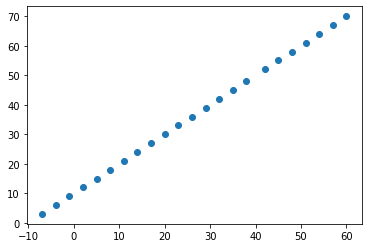

In [15]:
# Features 
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0, 17.0, 20.0, 23.0, 26.0, 29.0, 32.0, 35.0, 38.0, 42.0, 45.0, 48.0, 51.0, 54.0, 57.0, 60.0])

# Labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0, 30.0, 33.0, 36.0, 39.0, 42.0, 45.0, 48.0, 52.0, 55.0, 58.0, 61.0, 64.0, 67.0, 70.0])

# Visualization
plt.scatter(X, y);

In [16]:
# Truning the NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(23,), dtype=float32, numpy=
 array([-7., -4., -1.,  2.,  5.,  8., 11., 14., 17., 20., 23., 26., 29.,
        32., 35., 38., 42., 45., 48., 51., 54., 57., 60.], dtype=float32)>,
 <tf.Tensor: shape=(23,), dtype=float32, numpy=
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30., 33., 36., 39.,
        42., 45., 48., 52., 55., 58., 61., 64., 67., 70.], dtype=float32)>)

2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [17]:
# Making the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=["mae"])

# Fit
model.fit(X, y, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 413ms/step - loss: 42.0482 - mae: 42.0482
Epoch 2/200
1/1 [==============================] - 0s 8ms/step - loss: 38.5191 - mae: 38.5191
Epoch 3/200
1/1 [==============================] - 0s 8ms/step - loss: 34.9893 - mae: 34.9893
Epoch 4/200
1/1 [==============================] - 0s 6ms/step - loss: 31.4510 - mae: 31.4510
Epoch 5/200
1/1 [==============================] - 0s 5ms/step - loss: 27.8932 - mae: 27.8932
Epoch 6/200
1/1 [==============================] - 0s 5ms/step - loss: 24.3031 - mae: 24.3031
Epoch 7/200
1/1 [==============================] - 0s 5ms/step - loss: 20.6696 - mae: 20.6696
Epoch 8/200
1/1 [==============================] - 0s 4ms/step - loss: 16.9823 - mae: 16.9823
Epoch 9/200
1/1 [==============================] - 0s 8ms/step - loss: 13.2301 - mae: 13.2301
Epoch 10/200
1/1 [==============================] - 0s 10ms/step - loss: 9.4017 - mae: 9.4017
Epoch 11/200
1/1 [==============================] - 0s 5ms

In [18]:
# Make a prediction
y_pred = model.predict([15.0])
y_pred

array([[23.55411]], dtype=float32)

3. Try and improve the results we got on the insurance dataset, some things you might want to try include:

* Building a larger model 
* Increasing the number of units in each layer.
* Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer? (say 300 epochs instead of 200)

In [19]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Preprocessing the data

In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#Build the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to the training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

The data has been normalized and one hot ecoded. Now the NN model

In [23]:
# NN model to fit the normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 12122.4551 - mae: 12122.4551
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 7648.9434 - mae: 7648.9434
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 5989.5879 - mae: 5989.5879
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 3933.2312 - mae: 3933.2312
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 3631.3118 - mae: 3631.3118
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 3640.4832 - mae: 3640.4832
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 3561.0747 - mae: 3561.0747
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 3656.8723 - mae: 3656.8723
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 3599.5771 - mae: 3599.5771
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 3555.4492 - mae: 3555.44